In [150]:
import numpy as np
import pandas as pd

In [151]:
df = pd.read_csv('spam.csv',encoding="ISO-8859-1")

In [152]:
df.sample(3)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1532,ham,Unfortunately i've just found out that we have...,NaN,NaN,NaN
1870,ham,"Aight, I'll text you when I'm back",NaN,NaN,NaN
5043,ham,"Dunno, my dad said he coming home 2 bring us o...",NaN,NaN,NaN


data cleaning 
eda
text preprocessing
model building
evaluation
improvements
website conversion


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [154]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace = True)

In [155]:
df.sample(5)

,v1,v2
3372,ham,Looks like you found something to do other tha...
3642,ham,"Sorry, left phone upstairs. OK, might be hecti..."
740,ham,Yes i will be there. Glad you made it.
1291,ham,Hey babe! I saw you came online for a second a...
342,ham,Where u been hiding stranger?


renaming columns

In [156]:
df.rename(columns={'v1': 'target','v2':'text'}, inplace=True) 
df.sample(5)

,target,text
1193,spam,Sex up ur mobile with a FREE sexy pic of Jorda...
3718,spam,"Thanks for your ringtone order, reference numb..."
4001,ham,Did you get any gift? This year i didnt get an...
3890,ham,No problem. We will be spending a lot of quali...
1677,ham,Lol where do u come up with these ideas?


In [157]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [158]:
df['target'] = encoder.fit_transform(df['target']) #assigning 0,1 values to either spam or ham

In [159]:
df.duplicated().sum()

403

In [160]:
df = df.drop_duplicates(keep='first')

In [161]:
df.shape

(5169, 2)

EDA

In [162]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

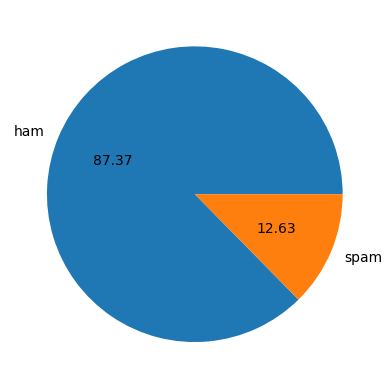

In [163]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'], autopct="%0.2f")
plt.show()

data imbalance

In [164]:
import nltk

In [165]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kamal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [166]:
df['num_characters'] = df['text'].apply(len) #number of characters

In [167]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [168]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [169]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [170]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [171]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [172]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [173]:
#ham messages
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [174]:
#spam messages
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [175]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

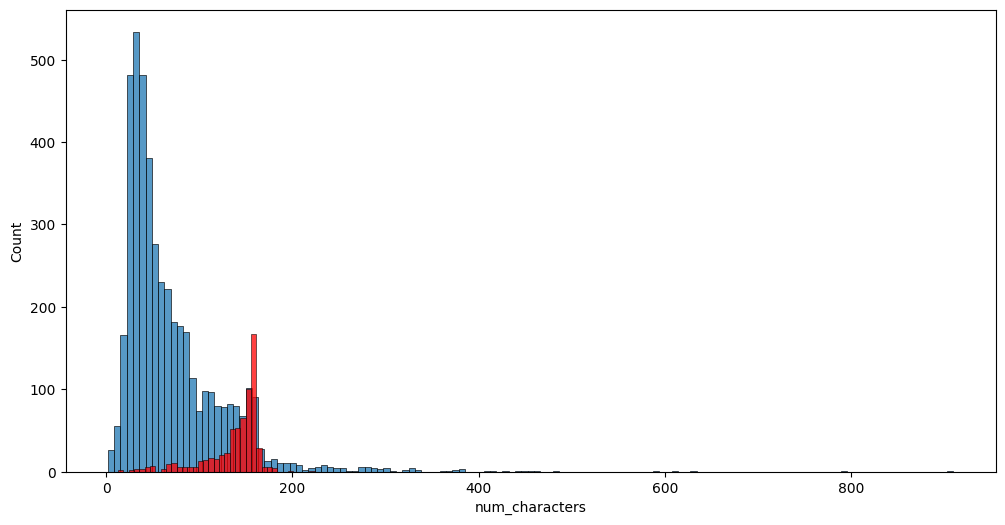

In [176]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

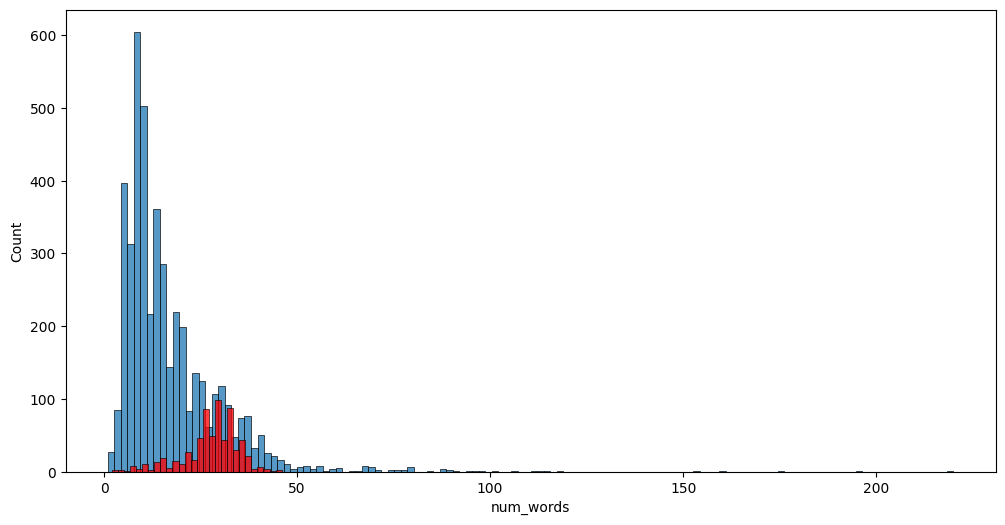

In [177]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

c:\Users\kamal\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


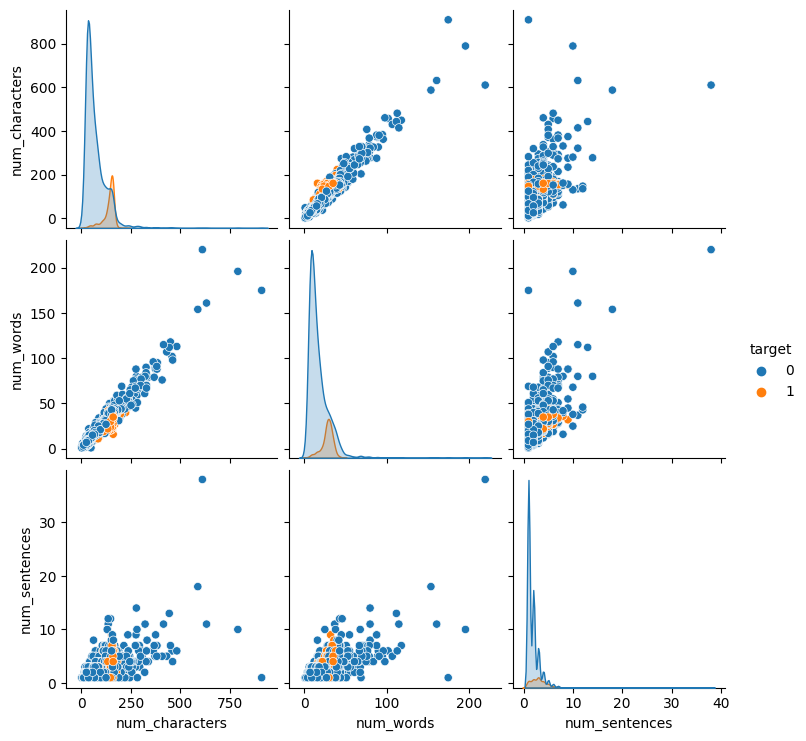

In [178]:
sns.pairplot(df,hue='target')

In [179]:
tf = df[['target','num_characters','num_words','num_sentences']]

<Axes: >

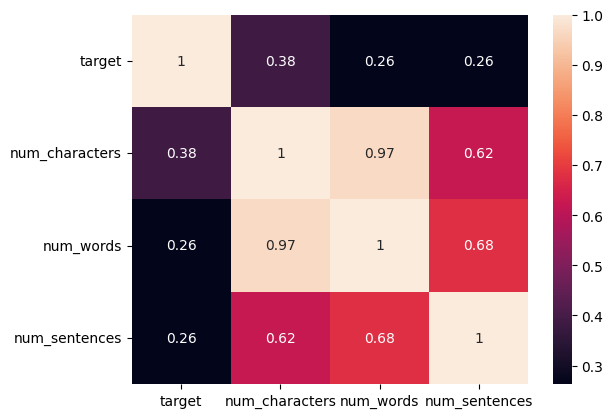

In [180]:
sns.heatmap(tf.corr(),annot=True)

data preprocessing
1 lower case
2 tokenization
3 removing special characters
4 removing stop words and punctutations
5 stemming

In [181]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kamal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [182]:
import string
def transform_text(text):
    ps = PorterStemmer()
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    stop_words = set(stopwords.words('english')) #faster lookup
    for i in text:
    # Check if the word is not a stopword and not a punctuation
        if i not in stop_words and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)



In [183]:
df['transform_text'] = df['text'].apply(transform_text)

In [184]:
df.head()

,target,text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [185]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [186]:
spam_wc = wc.generate(df[df['target'] == 1]['transform_text'].str.cat(sep=" "))

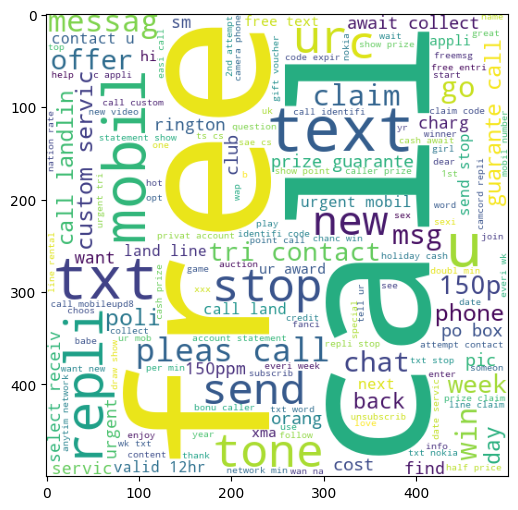

In [187]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

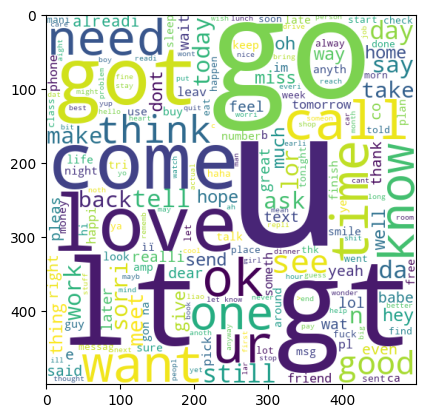

In [188]:
ham_wc = wc.generate(df[df['target'] == 0]['transform_text'].str.cat(sep=" "))
#plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [189]:
from collections import Counter
spam_corpus = []
for msg in df[df['target'] == 1]['transform_text'].to_list():
    for word in msg.split():
        spam_corpus.append(word)


ham_corpus = []
for msg in df[df['target'] == 0]['transform_text'].to_list():
    for word in msg.split():
        ham_corpus.append(word)

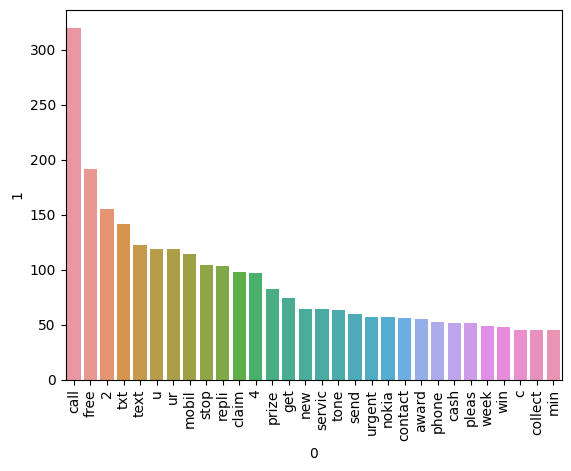

In [190]:
word_counter = Counter(spam_corpus)
most_common_words = word_counter.most_common(30)
# Create a DataFrame from the most common words
data = pd.DataFrame(most_common_words)
# Plot the bar plot using Seaborn
sns.barplot(x=0, y=1, data=data)  # Use column indices as x and y
plt.xticks(rotation='vertical')
plt.show()

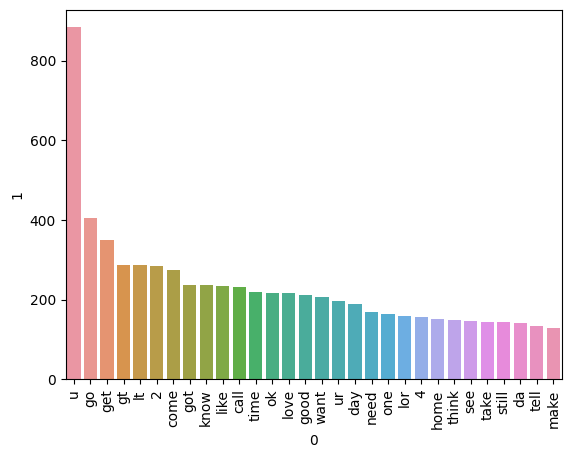

In [191]:
word_counter_ham = Counter(ham_corpus)
most_common_words_ham = word_counter_ham.most_common(30)
# Create a DataFrame from the most common words
data_ham = pd.DataFrame(most_common_words_ham)

# Plot the bar plot using Seaborn
sns.barplot(x=0, y=1, data=data_ham)  # Use column indices as x and y
plt.xticks(rotation='vertical')
plt.show()

Model Building

In [234]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [235]:
X = tfidf.fit_transform(df['transform_text']).toarray()

In [236]:
X.shape

(5169, 3000)

In [237]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [238]:
from sklearn.model_selection import train_test_split

In [239]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [240]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [241]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [242]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))


0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [243]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [244]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))